# Feedforward neural networks

Feedforward neural networks, also called multilayer perceptrons, are the most basic DNN architecture one can encounter in the literature. They are composed by a stack of $N$ layers performing an affine transformation followed by an activation function. The output of each hidden layer $n$ (a layer that does not have direct access to the output) is therefore given by:

$$
a^{(n)} = W^{(n)}h^{(n-1)} + b^{(n)} \\
h^{(n)} = g(a^{(n)})
$$

where $W^{(n)}, b^{(n)}$ are the weight matrix and bias vector of the n-th affine transform and $g(.)$ is the activation function of the n-th layer. $W^{(n)}, b^{(n)}$ are the parameters to be learned for each layer.

![](mlp.png)

## Hidden layer activation functions

- Main objective of using an activation function is to add a non-linearity to a layer (if we only used linear/affine projections without a non-linearity, depth would not be useful)
- The most popular non-linearity used to be smooth functions such as 
    - **Sigmoid**: $\sigma(x) = \frac{1}{1 + e^{-x}} $
    - **Hyperbolic tangent**: $\tanh(x) = \frac{1 - e^{-2x}}{1 + e^{-2x}}$
- However, "modern" DNNs: use **rectified linear** (ReLU) functions, which are cheaper to compute (both in the forward and backward passes) and lead to good results. The ReLU is given by $\mbox{ReLU}(x) = \max(0, x)$

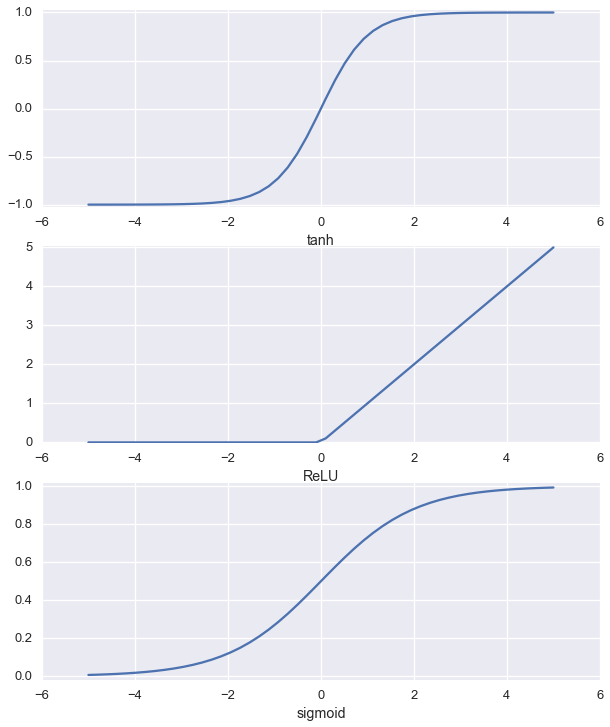

In [8]:
%matplotlib inline

import keras.backend as K
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_context('talk')

activations = {'sigmoid': K.sigmoid, 'tanh': K.tanh, 'ReLU': K.relu}

x = K.placeholder(ndim=1)

plt.figure(figsize=(10,12))
idx = 0

for name, activation in activations.items():
    f = K.function([x], activation(x))
    y = f([np.linspace(-5, 5)])
    plt.subplot(3,1,idx+1)
    plt.plot(np.linspace(-5, 5), y)
    plt.xlabel(name)
    idx += 1
    plt.ylim([np.min(y)-0.025, np.max(y)+0.025])

To specify the activation function of a `Dense` layer, simply pass the name of the function (`'linear', 'sigmoid', 'tanh', 'relu'`) as the keyword parameter `activation`.

In [ ]:
model.add(Dense(100, activation='sigmoid'))

## Output activation functions

The last layer of a feedforward neural network is called the output layer. It is similar to a hidden layer, but for the hidden layer we have to choose an activation function that corresponds to the type of output we intend to model:

- Linear: Gaussian output distributions
- Sigmoid: Bernoulli output distributions (binary classification)
- Softmax: Multinoulli output distributions (multiclass classification)

The **softmax**, also called normalized exponential, is a generalization of the sigmoid that converts a K-dimensional vector of arbitrary real values to a K-dimensional vector of real values in the range (0, 1) that add up to 1:

$$ \mbox{softmax}(x)_j = \frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}} $$

We can see the output of a softmax as $P(y = j~|~x)$.

Keras does not distinguish a hidden layer from an output layer, so your output layer will be the last layer added to a `Sequential` model. Remember to set the dimensions to be the same as your target variable.

## Cost functions

Like with the output activations, the cost function is chosen depending on the expected output distribution.

- Cross-entropy: for Bernoulli and Multinoulli output distributions (binary and categorical classification)
- Mean-squared error: for Gaussian output distributions

There are other cost functions in Keras (check [the documentation](http://keras.io/objectives/) to see which ones are available).

Choosing a cost function is similar to choosing an activation function: just pass it as a string or Python function using the keyword parameter `loss` to `model.compile`. All the standard cost functions have string shortcuts, so you can use `'mse', 'binary_crossentropy', 'categorical_crossentropy'` instead of having to import the functions from `keras.objectives`.